What I want to do in this web scrapping assignment:
1. Scrap the data from Wikipedia about list of notable firms in Hong Kong  - https://en.wikipedia.org/wiki/List_of_companies_of_Hong_Kong

2. Get the company data (with all attributes) and put them into a data frame

3. Answer the following questions (within HK notable firms):
 - Which is the largest industry? (Bar chart)
 - Which is the largest sector? (Bar chart / heat map)
 - What are the Top 5 sectors in the largest industry and their percentages? (Pie Chart)
 - Compare industy VS year founded


In [1]:
# Initiating
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
# Set the page URL for web scrap
url = 'https://en.wikipedia.org/wiki/List_of_companies_of_Hong_Kong'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html')

#print (soup)

In [3]:
# Get the list of notable firms in Hong Kong
table = soup.find('table', class_ = 'wikitable sortable')

#print (table)

In [4]:
# Get the table headers
headers = table.find_all('th')

# Get the text of headers
headers_text = [header.text.strip() for header in headers]
print(headers_text)

['Name', 'Industry', 'Sector', 'Headquarters', 'Founded', 'Notes']


In [5]:
# Create a dataframe to contains the headers
df = pd.DataFrame(columns = headers_text)

#df

In [6]:
# Get row data and fill in to dataframe
column_content = table.find_all('tr')

for row in column_content[1:]:
    row_content = row.find_all('td')
    row_text = [row.text.strip() for row in row_content]

    table_length = len(df)
    df.loc[table_length] = row_text

df

,Name,Industry,Sector,Headquarters,Founded,Notes
0,Aji Ichiban,Consumer services,Food retailers & wholesalers,Hong Kong,1993,Snack food retailer
1,Ality,Consumer goods,Consumer electronics,Hong Kong,2005,Household technology
2,Amoy Food,Consumer goods,Food products,Tai Po,1928,Food and condiments
3,Animoca Brands,Technology,Software,Hong Kong,2011,Games
4,A.S. Watson Group,Consumer goods,Personal products,Hong Kong,1828,Health and beauty retailer
...,...,...,...,...,...,...
94,Vita Green,Consumer goods,Personal products,Hong Kong,1993,Health and beauty products
95,Vitasoy,Consumer goods,Food products,Tuen Mun,1940,Beverages and deserts
96,VTech,Technology,Telecommunications equipment,Hong Kong,1976,Cordless telephones
97,Wing Lung Bank,Financials,Banks,Hong Kong,1933,Banks


Time to answer questions!

Question 1 -  - Which is the largest industry? (Bar chart)

In [7]:
import matplotlib.pyplot as plt

In [8]:
# Create a new table for data manipulations
industry_dict = {}

df['Industry'] = df['Industry'].map(str.title)

industry_list = list(set(df['Industry'].to_list()))

for industry in industry_list:

  industry_dict[industry] = len(df.loc[df['Industry'] == industry].index)

sorted_industry_dict = dict(sorted(industry_dict.items(), key=lambda x:x[1], reverse=True))
sorted_industry_dict

{'Consumer Services': 47,
 'Financials': 19,
 'Industrials': 10,
 'Consumer Goods': 9,
 'Technology': 7,
 'Conglomerates': 3,
 'Utilities': 3,
 'Telecommunications': 1}

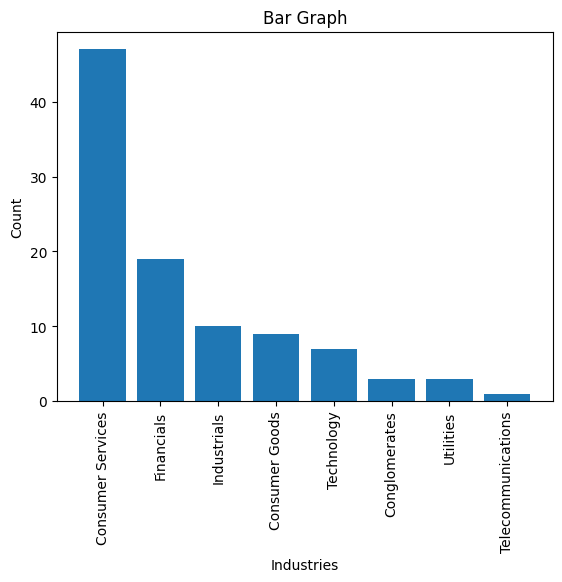

In [9]:
# Extract category names and corresponding amounts
categories = list(sorted_industry_dict.keys())
amounts = list(sorted_industry_dict.values())


# Plotting the bar graph
plt.bar(categories, amounts)

# Customize the plot
plt.xlabel('Industries')
plt.ylabel('Count')
plt.title('Bar Graph')
plt.xticks(rotation=90)

# Show the plot
plt.show()

Question 2 -- Which is the largest sector? (Bar chart / heat map)

In [15]:
# Create a new table for data manipulations on sectors
sector_dict = {}

sector_list = list(set(df['Sector'].to_list()))

for sector in sector_list:

  sector_dict[sector] = len(df.loc[df['Sector'] == sector].index)

sorted_sector_dict = dict(sorted(sector_dict.items(), key=lambda x:x[1]))
sorted_sector_dict

{'Railroads': 1,
 'Gas distribution': 1,
 'Marine transportation': 1,
 'Computer hardware': 1,
 'Heavy construction': 1,
 'Fixed line telecommunications': 1,
 'Broadline retailers': 1,
 'Computer Hardware': 1,
 'Electronic & electrical equipment': 1,
 'Food retailers & wholesalers': 1,
 'Telecommunications equipment': 1,
 'Recreational products': 1,
 'Technology hardware & equipment': 1,
 'Building materials & fixtures': 1,
 'Restaurants & bars': 2,
 'Delivery services': 2,
 'Consumer electronics': 2,
 'Conventional electricity': 2,
 'Entertainment': 2,
 'Publishing': 2,
 'Telecommunication services': 2,
 'Software': 3,
 'Specialty retailers': 3,
 'Hotels': 3,
 '-': 3,
 'Food products': 3,
 'Personal products': 3,
 'Transportation services': 3,
 'Airlines': 4,
 'Real estate holding & development': 4,
 'Travel & tourism': 6,
 'Apparel retailers': 9,
 'Broadcasting & entertainment': 12,
 'Banks': 15}

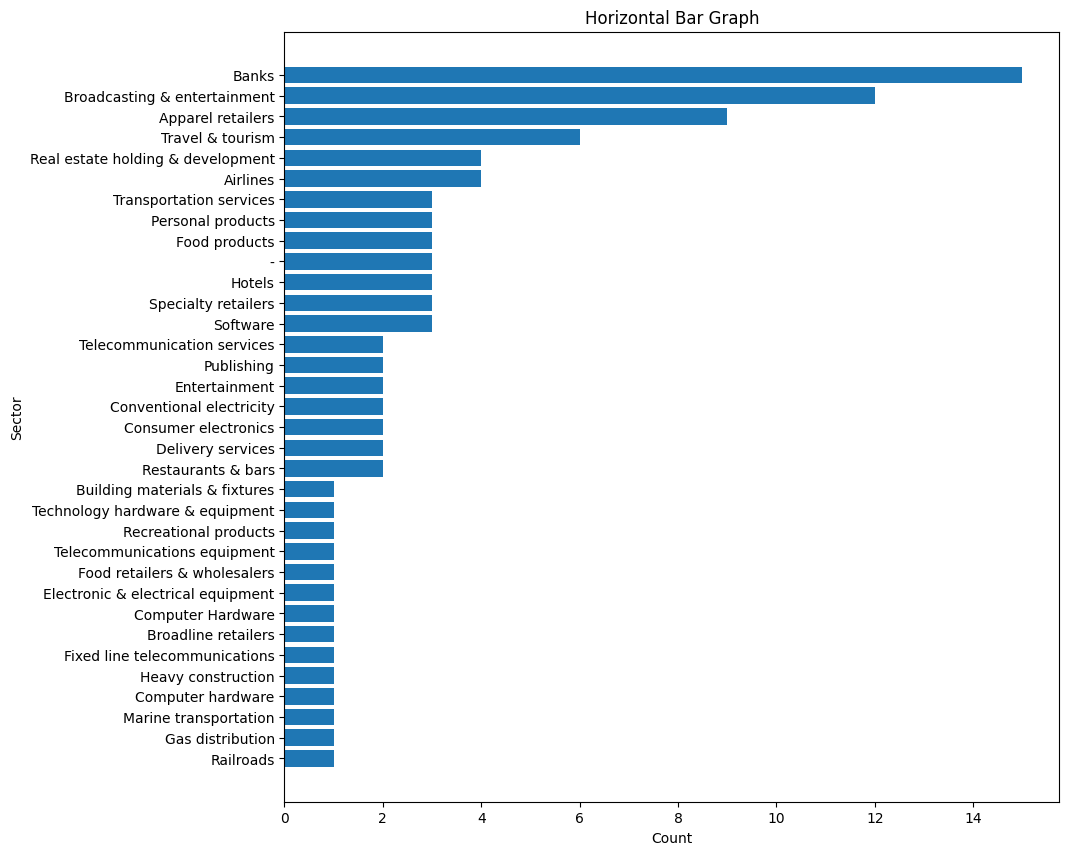

In [30]:
# Create horizontal bar chart

# Extract category names and corresponding amounts
categories = list(sorted_sector_dict.keys())
amounts = list(sorted_sector_dict.values())


# Plotting the bar graph
plt.figure(figsize=(10, 10))
plt.barh(categories, amounts)

# Customize the plot
plt.xlabel('Count')
plt.ylabel('Sector')
plt.title('Horizontal Bar Graph')
plt.xticks(rotation=0)

# Show the plot
plt.show()

Question 3 -- What are the Top 5 sectors in the largest industry and their percentages? (Pie Chart)

In [40]:
# Get the largest industry
max_industry = sorted(industry_dict.items(), key=lambda x:x[1],reverse=True)[0][0]
max_industry

'Consumer Services'

In [55]:
# Create a new table for data manipulations on sectors
ind_sector_dict = {}

ind_sector_list = list(set(df['Sector'].to_list()))

short_listed_df = df.loc[df['Industry'] == max_industry]

for sector in ind_sector_list:
  length_of_sector = len(short_listed_df.loc[short_listed_df['Sector'] == sector].index)
  if length_of_sector>0:
    ind_sector_dict[sector] = len(short_listed_df.loc[short_listed_df['Sector'] == sector].index)

sorted_ind_sector_dict = dict(sorted(ind_sector_dict.items(), key=lambda x:x[1] ,reverse=True)[:5])
sorted_ind_sector_dict

{'Broadcasting & entertainment': 12,
 'Apparel retailers': 9,
 'Travel & tourism': 6,
 'Airlines': 4,
 'Specialty retailers': 3}

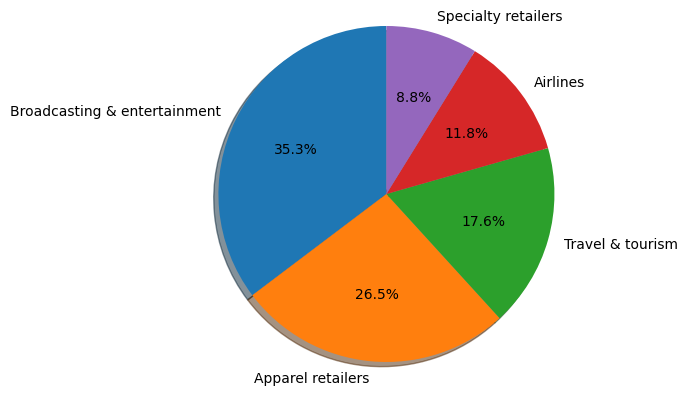

In [56]:
labels = sorted_ind_sector_dict.keys()
sizes = sorted_ind_sector_dict.values()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Question 4 -- Compare industy VS year founded

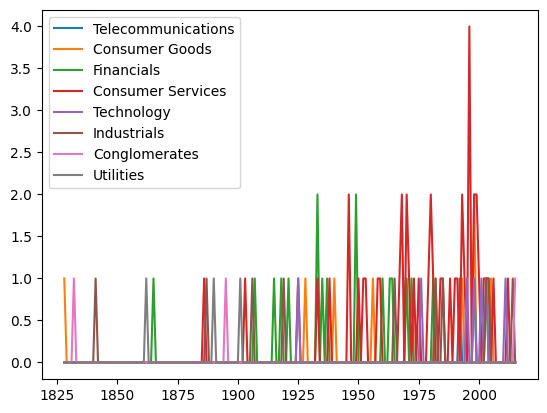

In [70]:

# importing the required libraries
import numpy as np

# Create founded array
founded = df['Founded'].astype(int).to_list()
found_year = range(min(founded),max(founded))

# define data values
x = found_year  # X-axis points
for industry in industry_list:
  industry_y=[]
  industry_filtered=df.loc[df['Industry'] == industry]
  for year in found_year:
    industry_y.append(len(industry_filtered.loc[industry_filtered['Founded']==str(year)].index))
  plt.plot(x,industry_y, label=industry)

# plt.plot(x, y)  # Plot the chart
plt.legend()
plt.show()  # display

Conclusion for HK notable companies analysis:

1. **Consumer Services** is the largest industry
2. **Bank** is the largest sector
3. Within Consumer Services industry, **Broadcasting & entertainment** is the largest sector, which accounts for 35.3% of the Consumer Services industry
4. Financials developed first at around 1930s-1950s, while Consumer Services boomed the most near 1990s